In [17]:
import pandas as pd
import matplotlib.pyplot as plt



In [18]:
import numpy as np


In [24]:
df = pd.read_csv('topo_size_cp.csv')
df = df.sort_values(by=['Testcase'])
df = df[["Testcase","# Switches", "Optimization Time (ms)"]]
df = df.groupby("Testcase").agg({"Optimization Time (ms)": np.mean, "# Switches": np.mean})
df

,Optimization Time (ms),# Switches
Testcase,,
topo_size0,959.0,6
topo_size1,1032.2,8
topo_size2,1200.0,10
topo_size3,2231.2,12
topo_size4,6959.2,14
topo_size5,6682.8,16
topo_size6,6996.2,18
topo_size7,15037.8,20
topo_size8,17946.6,22


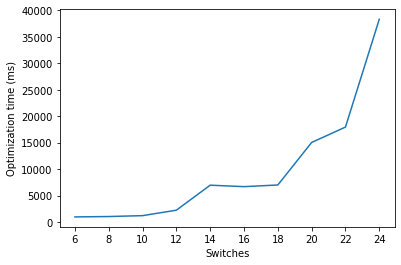

In [27]:
x = df["# Switches"]
y = df["Optimization Time (ms)"]
plt.plot(x,y)
plt.xticks(x)
plt.xlabel("Switches")
plt.ylabel("Optimization time (ms)")
plt.show()